<a href="https://colab.research.google.com/github/GhaziDhouafli/Machine-Learning-Projects/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [47]:
house_price_dataset= sklearn.datasets.load_boston()
house_price_dataframe=pd.DataFrame(house_price_dataset.data ,  columns = house_price_dataset.feature_names)
house_price_dataframe['price']= house_price_dataset.target
house_price_dataframe.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [48]:
house_price_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

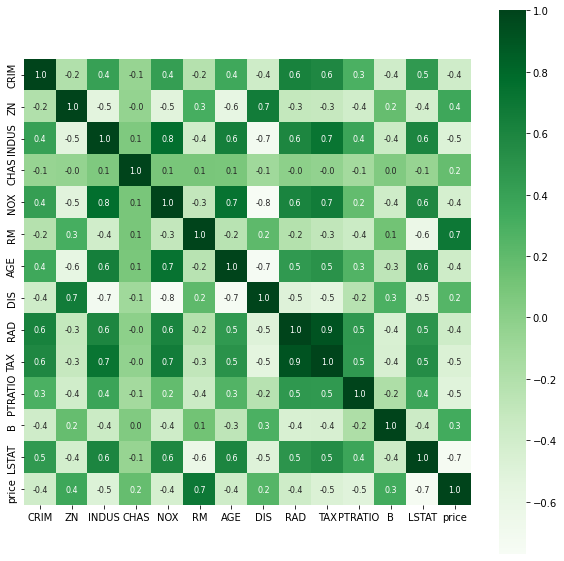

In [49]:
correlation = house_price_dataframe.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square= True, fmt='.1f',annot=True,annot_kws={'size':8},cmap='Greens')

In [50]:
X = house_price_dataframe.drop(['price'], axis =1)
Y= house_price_dataframe['price']


In [51]:
models=[RandomForestRegressor(),XGBRegressor()]
for model in models:
  cv_score = cross_val_score(model, X,Y, cv=5)
  mean_accuracy = sum(cv_score)/len(cv_score)
  mean_accuracy = mean_accuracy*100
  print('Cross Validation accuracies for ', model, '=  ', cv_score)
  print('Accuracy % of the ', model, mean_accuracy)

Cross Validation accuracies for  RandomForestRegressor() =   [0.7740482  0.85199962 0.72861784 0.47709182 0.2251088 ]
Accuracy % of the  RandomForestRegressor() 61.137325670780164
[23:11:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:11:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:11:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:11:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:11:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross Validation accuracies for  XGBRegressor() =   [0.77955736 0.85656904 0.79106707 0.57326677 0.41285553]
Accuracy % of the  XGBRegressor() 68.2663151886891


As We can see here, XGBRegressor has the higher Accuracy so it's the Algorithm that we gonna use to keep developing our model

In [52]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)
model = XGBRegressor()
model.fit(X_train,Y_train)

[23:14:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [53]:
test_data_prediction = model.predict(X_test)
score =metrics.mean_absolute_error(Y_test, test_data_prediction)
print('Mean absoluet error=',score)

Mean absoluet error= 1.9922956859364223


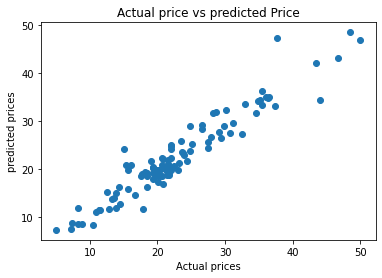

In [54]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual prices')
plt.ylabel('predicted prices')
plt.title('Actual price vs predicted Price')
plt.show()